In [1]:
from medpy.io import load
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

GraphCuts is the name for a collection of energy minimization algorithms (https://en.wikipedia.org/wiki/Graph_cuts_in_computer_vision). We employ it here for image segmentation.

This scripts performs a marker based image segmentation by constructing a graph from the images voxels and then looking for the globally optimal cut to seperate the marker areas.

Various versions are provided (https://loli.github.io/medpy/graphcut.html), but we will concentrate here on only two.

## Gradient based

<table>
<tr>
<td><img alt="" src="images/b0.png" width="200" /></td>
<td><img alt="" src="images/b0wmarker.png" width="200" /></td>
<td><img alt="" src="images/b0gradient.png" width="200" /></td>
</tr>
<tr>
<td>Original image</td>
<td>Foreground (red) and background (green) marker on original image</td>
<td>Gradient image</td>
</tr>
</table>

Let's assume we want to segment the ventricle from a brain scan (left image). We first create some (manual or automatic) markers (middle image). We furthermore require a gradient magnitude image of the brain scan, which we can obtain with

In [4]:
!medpy_gradient.py resources/b0.nii.gz output/gradient.nii.gz -f

To execute the graphcut, we call

In [5]:
!medpy_graphcut_voxel.py 10 output/gradient.nii.gz resources/b0markers.nii.gz output/graphcut_voxel_gradient.nii.gz --boundary diff_pow -f

Which results in
<img alt="voxel GC result gradient based" src="images/graphcut_voxel_gradient.png" width="300" /></td>

Which is acceptable, considering the ad-hoc usage we just performed. The first parameter passed to the script defines the *sigma*, i.e., the smoothness of the cut. Setting it to high will result in very smooth cuts, lower values allow the graphcut more freedom at the risk of leakages.

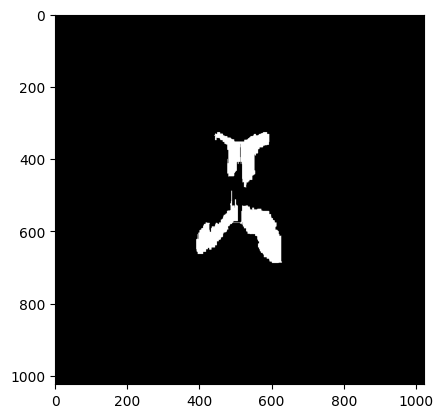

In [7]:
o1, _ = load("output/graphcut_voxel_gradient.nii.gz")
plt.imshow(o1, cmap = cm.Greys_r)

## Grayvalue based

Another usage of the script does not require the magnitude gradient, but rather the original image. It can be used by calling

In [8]:
!medpy_graphcut_voxel.py 1 resources/b0.nii.gz resources/b0markers.nii.gz output/graphcut_voxel_grayvalues.nii.gz --boundary=max_div -f

Which results in
<img alt="voxel GC result gradient based" src="images/graphcut_voxel_grayvalues.png" width="300" /></td>

This result is smoother and dooes better represent the real outline of the ventricles. But it failed to connect one of the foreground markers with the remaining foreground object.

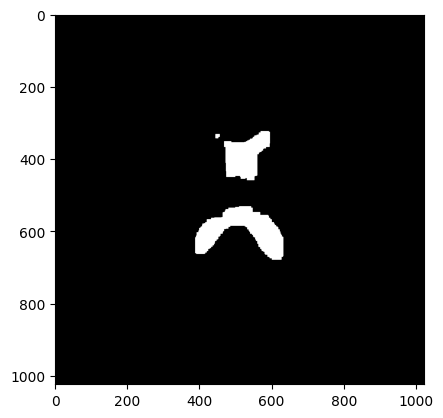

In [9]:
o2, _ = load("output/graphcut_voxel_grayvalues.nii.gz")
plt.imshow(o2, cmap = cm.Greys_r)

## Summary

Graphcuts are a frickle thing. They depend on the quality of the markers and the employed parameters. The examples shown here provide quite acceptable results that could be easily improved with further parameter tuning.

Furthermore, this script only uses the boundary term of graphcut, ignoring the regional term. **MedPy** does of course support both terms, see the package description for more details: https://loli.github.io/medpy/graphcut.html

For very large (e.g. 4D) images, the voxel based graphcut might be too memory consuming for a standard computer. You might want to consider using the label/region based grapcut shipped with **MedPy** instead. The label/region version is additionally faster and often produces superior results.